# 워드클라우드 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import platform
from matplotlib import font_manager, rc
if platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')
from wordcloud import WordCloud, STOPWORDS
import nltk

import pandas as pd
from wordcloud import ImageColorGenerator

#### 아래의 함수를 보면 font_path 부분에 자신이 원하는 폰트를 지정해주면 됨

#### "text" file has to be a list of tuples.

#### make_imagecoloredwc 는 mask 이미지의 색상을 가지고 워드클라우드를 만들고 싶을 때 사용
#### 사용법 : make_imagecoloredwc(wc를 만들고자 하는 파일, masking할 이미지)
#### 단, wc를 만들고자 하는 파일은 반드시 list of tuples의 형태여야 함

#### make_wc는 colormap에 있는 색상으로 워드클라우드를 만들때 사용
#### 사용법 : make_wc(wc를 만들고자 하는 파일, masking할 이미지, 색상지정)
#### 색상지정은 아래의 cmaps에 있는 컬러 중 하나를 사용하면 됨 (총 80개의 컬러 0~79)

In [5]:
def make_imagecoloredwc(text, mask_image,outputfile_name):
    wc = WordCloud(background_color="white", max_words=2000,font_path='C:/Windows/Fonts/Jalnan_1.ttf', mask=mask_image, max_font_size=90)
    # generate word cloud
    wc=wc.generate_from_frequencies(dict(text))
    f = plt.figure(figsize=(12, 12))
    plt.imshow(wc.recolor(color_func=ImageColorGenerator(mask_image)), interpolation="bilinear")
    plt.axis("off")
    plt.savefig(outputfile_name, transparent=True)

def make_wc(text, mask_image, color,outputfile_name):
    wc = WordCloud(background_color="white", max_words=2000,font_path='C:/Windows/Fonts/Jalnan_1.ttf', mask=mask_image, max_font_size=90,
                  colormap=color)
    # generate word cloud
    wc=wc.generate_from_frequencies(dict(text))
    f = plt.figure(figsize=(12, 12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    print(color)
    plt.savefig(outputfile_name, transparent=True)

    
cmaps=['viridis', 'plasma', 'inferno', 'magma', 'cividis','Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu','PuBuGn', 
       'BuGn', 'YlGn','binary','gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 
       'autumn', 'winter', 'cool', 'Wistia', 'hot','afmhot', 'gist_heat', 'copper','PiYG', 'PRGn', 
       'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral','coolwarm', 'bwr','seismic',
       'hsv','Pastel1', 'Pastel2', 'Paired', 'Accent','Dark2', 'Set1','Set2', 'Set3','tab10', 
       'tab20', 'tab20b', 'tab20c','flag', 'prism', 'ocean', 'gist_earth','terrain', 'gist_stern', 'gnuplot', 
       'gnuplot2', 'CMRmap', 'cubehelix', 'brg','gist_rainbow', 'rainbow', 'jet','nipy_spectral', 'gist_ncar']

len(cmaps)

80

In [3]:
#cat1 : 음식

cat1=list(pd.read_csv("왕교자_음식.csv").itertuples(index=False, name=False))
#단어와 빈도수로 구성되어 있는 dataframe을 불러와서 각 행을 tuple의 형태로 만든다. 
#그 다음 list로 변환

cat1_image1=np.array(Image.open("../data/jpg_icon/1.음식/접시1.jpg"))
cat1_image2=np.array(Image.open("../data/jpg_icon/1.음식/접시2.jpg"))
#mask로 쓸 이미지는 np.array로 불러온다.

inferno


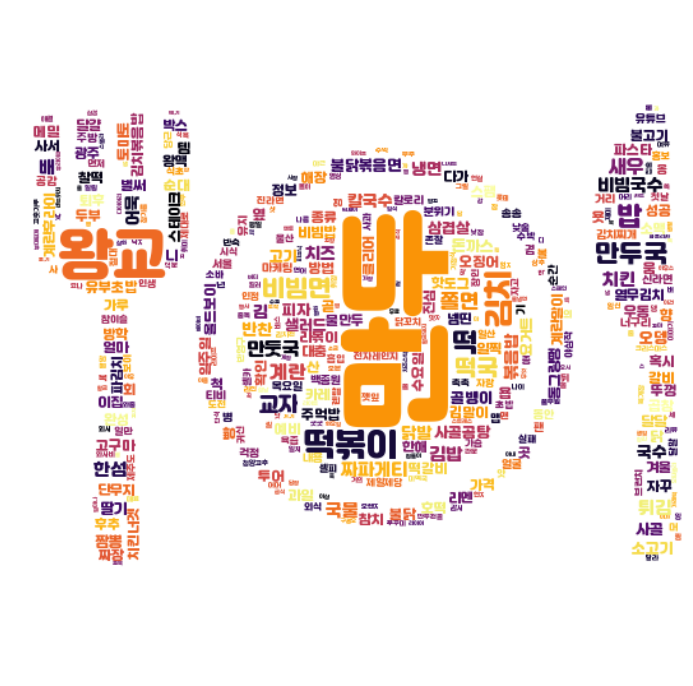

In [6]:
make_wc(cat1, cat1_image1, cmaps[2], "aa.png")
#make_wc(cat1, cat1_image2, cmaps[79])

In [6]:
#cat2: 음료
cat2=list(pd.read_csv("왕교자_음료.csv").itertuples(index=False, name=False))

cat2_image1=np.array(Image.open("../data/jpg_icon/2.음료/맥주1.jpg"))
cat2_image2=np.array(Image.open("../data/jpg_icon/2.음료/맥주2.jpg")) #color

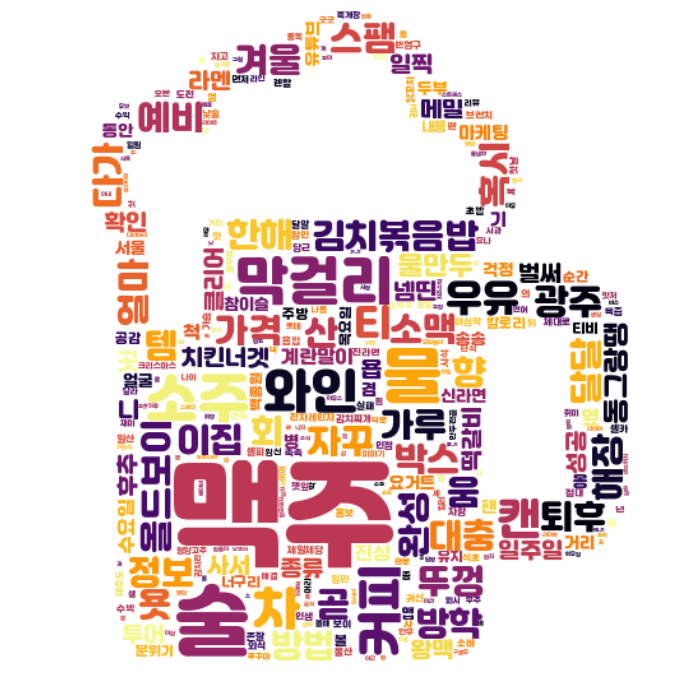

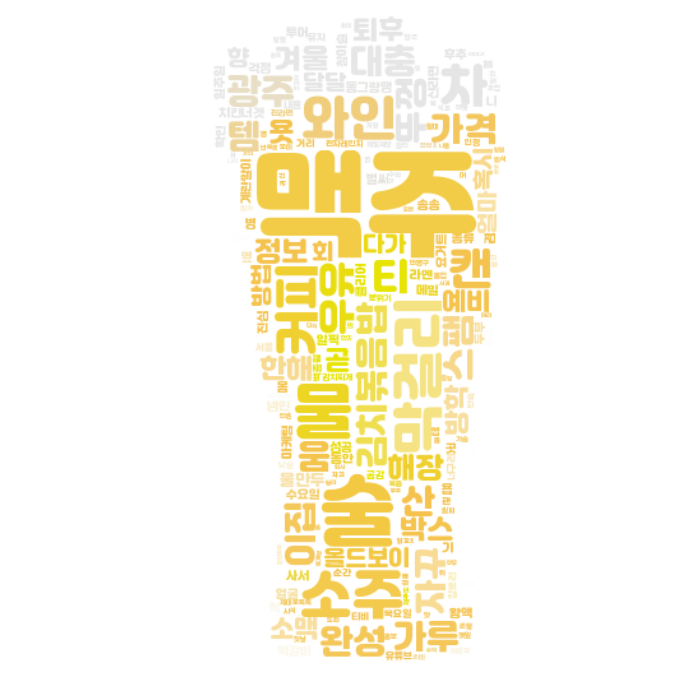

In [7]:
make_wc(cat2, cat2_image1, cmaps[2])
make_imagecoloredwc(cat2, cat2_image2)